<a href="https://colab.research.google.com/github/SuperNZH/IBM-ML-Professional-Certificate/blob/main/Capstone/1_EDA_and_Feature_Engineering/1_1_EDA_on_Online_Course_Enrollment_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Online Course Enrollment Data

Objectives:

*   Identify keywords in course titles using a WordCloud
*   Calculate the summary statistics and visualizations of the online course content dataset
*   Determine popular course genres
*   Calculate the summary statistics and create visualizations of the online course enrollment dataset
*   Identify courses with the greatest number of enrolled students

## Prepare and setup the lab environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# Set the random state
rs = 123

In [3]:
# Mount drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Load datasets

In [4]:
course_genre_url = '/content/drive/MyDrive/Colab_Notebooks/ibm_machine_learning/Capstone_RecSys/dataset/course_genre.csv'
ratings_url = '/content/drive/MyDrive/Colab_Notebooks/ibm_machine_learning/Capstone_RecSys/dataset/ratings.csv'

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

## Courses

Start form the `Course genre` dataset

In [6]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [7]:
course_df.shape

(307, 16)

In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [10]:
course_df.iloc[1, :]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

This dataset includes some metadata such as its id, title, and genres. In addition, the genres are topics related to ML, DB, App Dev, etc.

The number of unique courses is 307.

The `COURSE_ID` and `TITLE` are `str` type and others are `binary` type. For example, `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`.






### Word Cloud from Titles

In [11]:
# joining title values into 1 str will be easier to plot
titles = ' '.join(title for title in course_df['TITLE'].astype(str))

In [12]:
# Filter common stop words and some less meaningful words
stopwords = STOPWORDS
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [13]:
# Create a WordCloud object and generate wordcloud from the titles
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width = 800, height=400)
wordcloud.generate(titles)

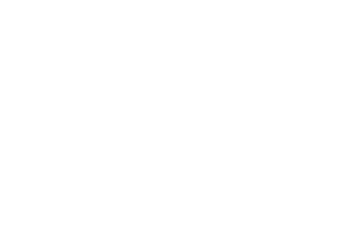

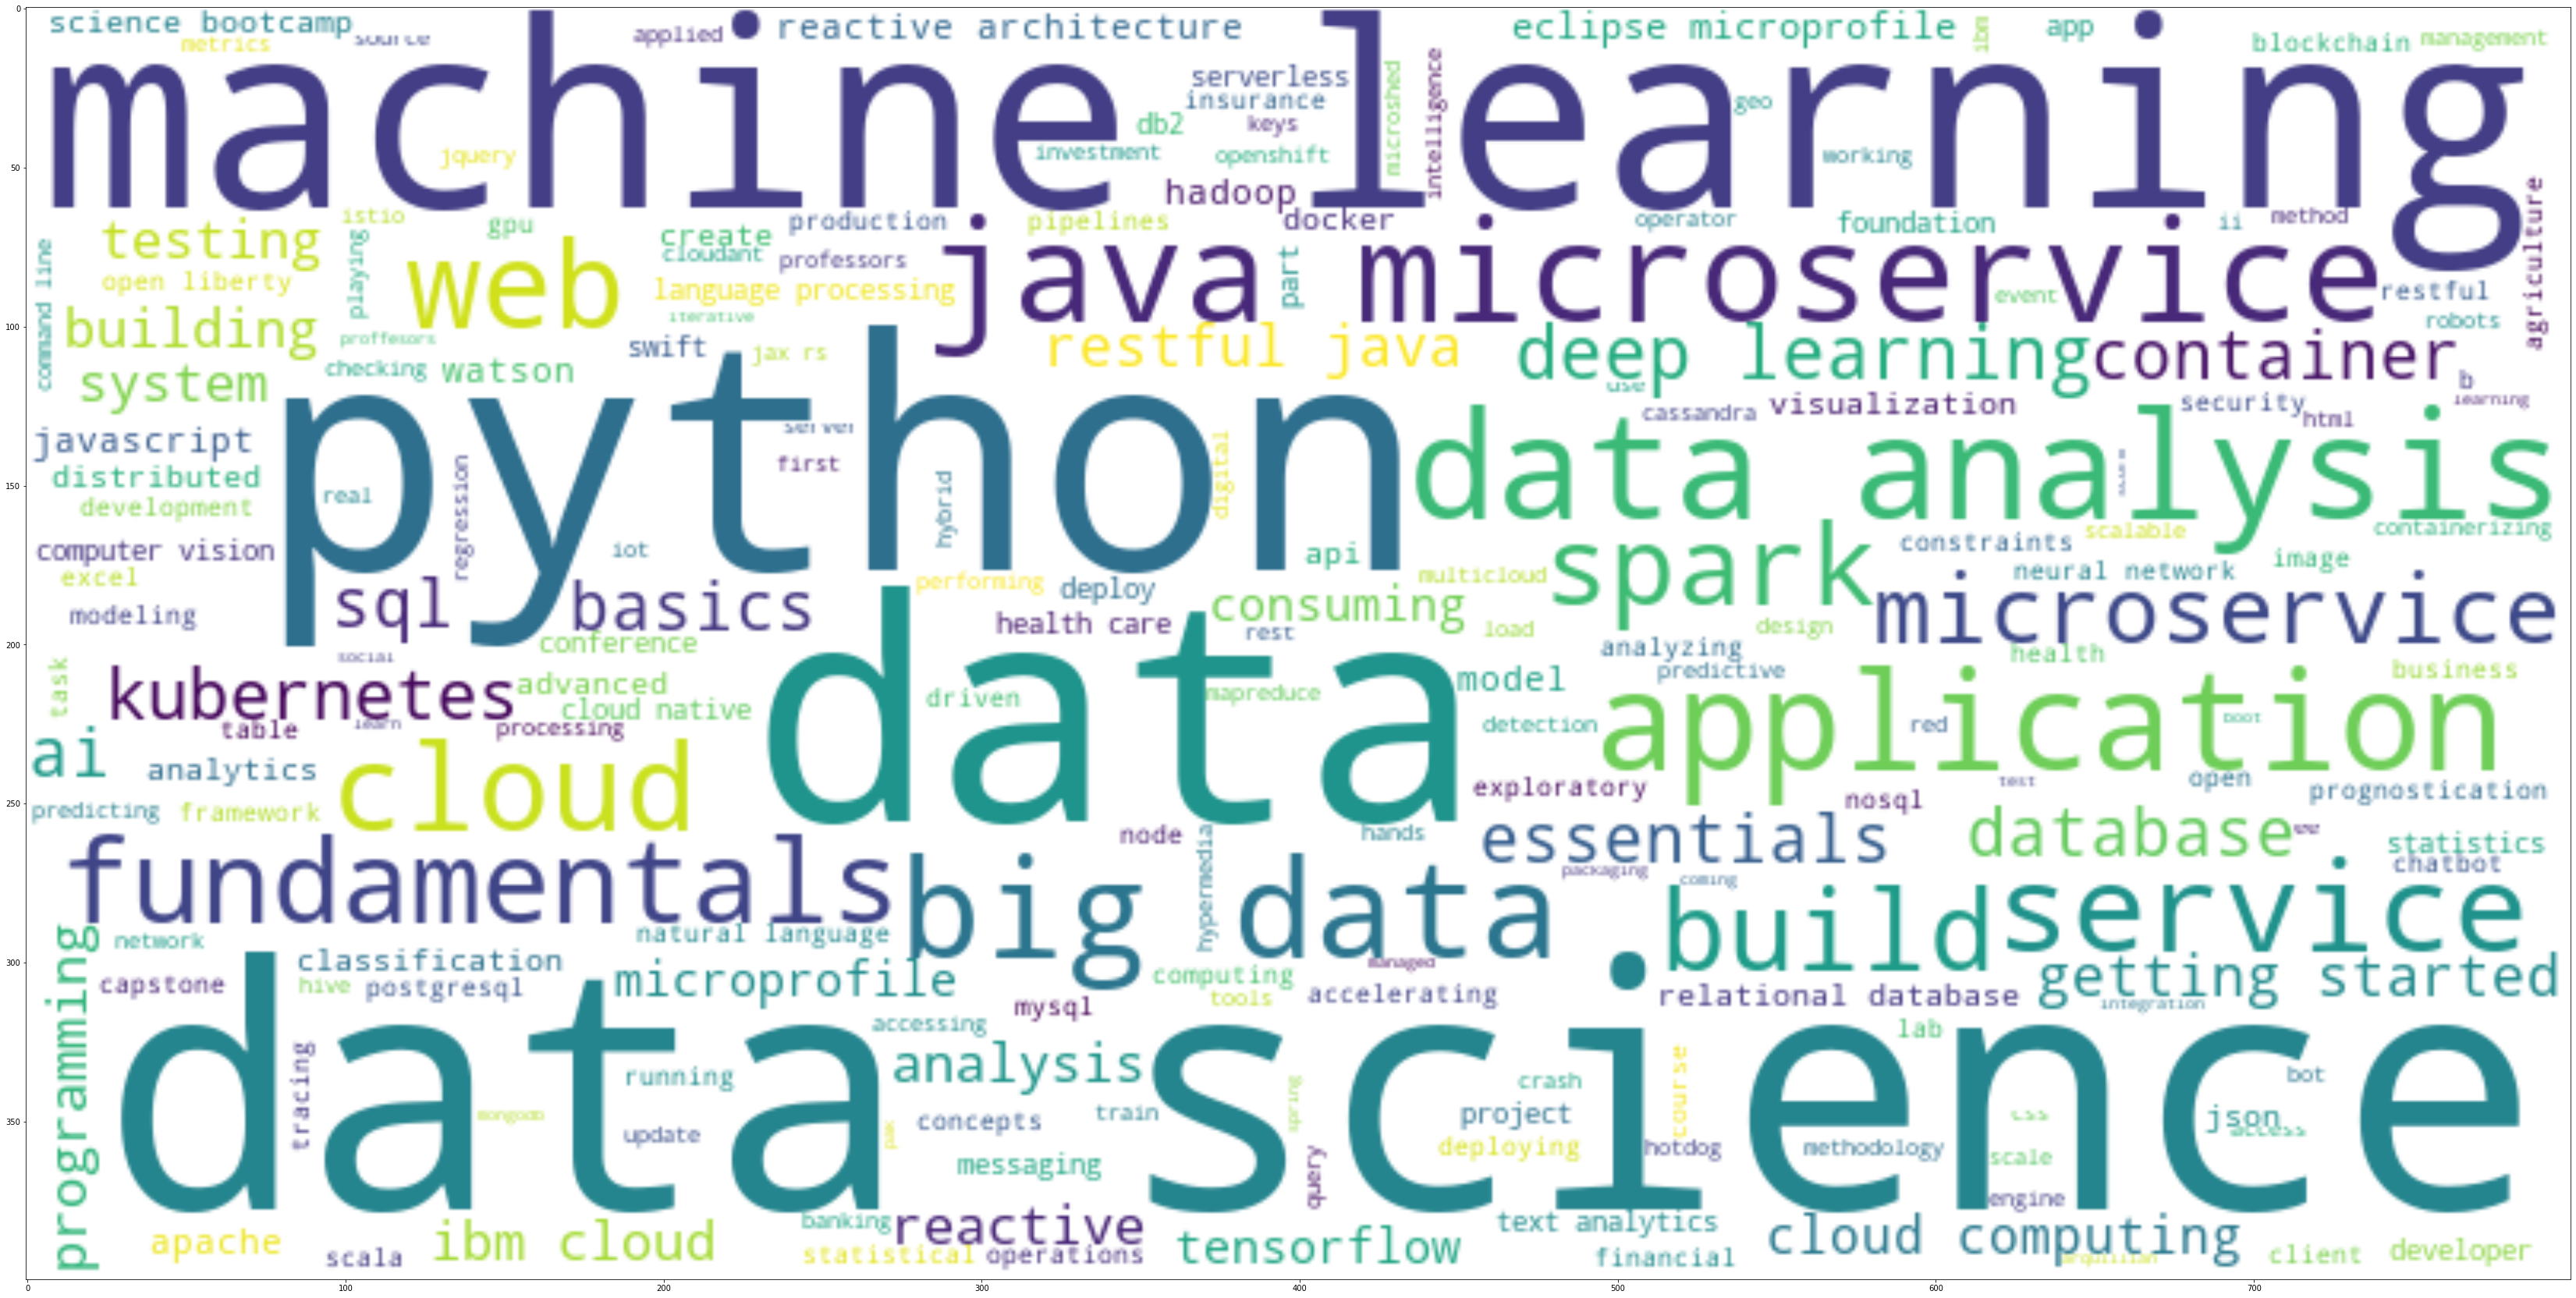

In [14]:
plt.axis('off')
plt.figure(figsize=(60, 30))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the wordcloud, there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.

### Genres

In [15]:
# ml_courses = course_df[course_df['MachineLearning'] == 1]
# scalable_ml_courses = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]

In [16]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now calculate the course count for each genre. We also want to sort the genre count list to find the most popular course genres.

In [17]:
sorted_genres = course_df[genres].sum().sort_values(ascending=False)
sorted_genres

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64

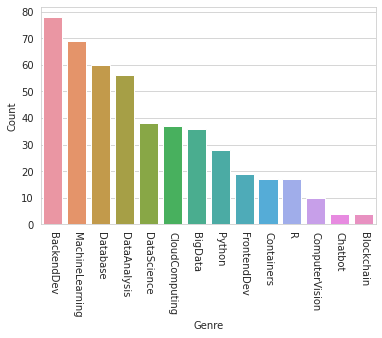

In [18]:
sns.set_style('whitegrid')
sorted_genres_sns = sns.barplot(x = sorted_genres.index, y = sorted_genres.values)
sorted_genres_sns.set_xticklabels(sorted_genres.index, rotation = 270)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show(sorted_genres_sns)

## Ratings

In [19]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


Naming Convention: `user` is a unique user id, `item` is a course id, and `rating` is a course enrollment mode.

In [20]:
ratings_df['rating'].unique()

array([3., 2.])

3 means the user completed the course and earned a certificate

2 means the user just audited the course without completing it.

1 means the user just browsed the course.

0 or NA means the user has no interaction with the course.

In [21]:
ratings_df.shape[0]

233306

### Enrollments
We have 233306 enrollments, in fact each user can interact multiple items

In [22]:
eromts = ratings_df.groupby('user').size()

In [23]:
eromts.shape

(33901,)

In [24]:
eromts.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

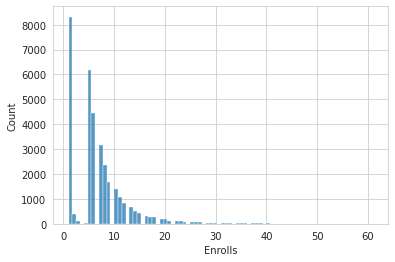

In [25]:
plt.xlabel('Enrolls')
sns.histplot(x=eromts.values, bins=80)

### Most Popular Courses

In [26]:
item_count = ratings_df.groupby('item').size().sort_values(ascending=False)
top20 = item_count[:20]

In [27]:
top20_df = pd.merge(course_df, top20.to_frame(), how='right', left_on='COURSE_ID', right_on='item').iloc[:, [1, -1]].rename(columns={0:'Enrolls'})
top20_df

,TITLE,Enrolls
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


It seems that those popular courses take a huge amount of total ratings

In [28]:
total = ratings_df.shape[0]
top = top20_df['Enrolls'].sum()
print(f"Percentage of the top course enrollments: {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments: 63.3%
